In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#load files
mouse_drug_data_to_load = r"mouse_drug_data.csv"
clinical_trial_data_to_load = r"clinicaltrial_data.csv"

In [35]:
# Read file 1
csv_path = r"clinicaltrial_data.csv"

ct_df = pd.read_csv(csv_path)

ct_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [51]:
# Read file 2
csv_path = r'mouse_drug_data.csv'

mouse_df = pd.read_csv(csv_path)

mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [37]:
# merge data files
merged_data = pd.merge(ct_df, mouse_df, on = "Mouse ID", how = "inner")

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [52]:
# subset tumor volume and calculate means

subset_df = merged_data.loc[:,["Timepoint", "Drug", "Tumor Volume (mm3)"]]

means = subset_df.groupby(["Drug", "Timepoint"]).mean()

means.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [39]:
# tumor volume - SEM for summary data frame
# sem = standard error of measurement
sems = subset_df.groupby(["Drug", "Timepoint"]).sem()

sems.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

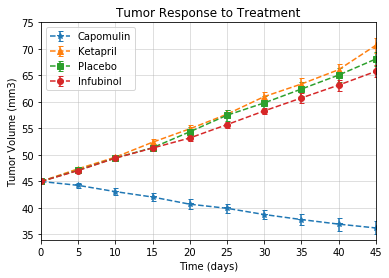

In [40]:
# scatter to show tumor volume over time per drug
plt.errorbar(np.arange(0, 50, 5), means.loc["Capomulin", "Tumor Volume (mm3)"],
             yerr = sems.loc["Capomulin", "Tumor Volume (mm3)"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), means.loc["Ketapril", "Tumor Volume (mm3)"],
             yerr = sems.loc["Ketapril", "Tumor Volume (mm3)"], fmt = '^--', capsize = 2.5, label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), means.loc["Placebo", "Tumor Volume (mm3)"],
             yerr = sems.loc["Placebo", "Tumor Volume (mm3)"], fmt = 's--', capsize = 2.5, label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), means.loc["Infubinol", "Tumor Volume (mm3)"],
             yerr = sems.loc["Infubinol", "Tumor Volume (mm3)"], fmt = 'o--', capsize = 2.5, label = "Infubinol")

plt.legend(loc="best")

plt.grid(alpha = 0.5)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.xlim(0,45)
plt.ylim(34,75)

plt.show()

In [41]:
# subset metastatic sites and calculate means
subset_df = merged_data.loc[:,["Timepoint", "Drug", "Metastatic Sites"]]

means = subset_df.groupby(["Drug", "Timepoint"]).mean()

means.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [42]:
# metastatic sites - SEM for summary data frame
sems = subset_df.groupby(["Drug", "Timepoint"]).sem()

sems.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

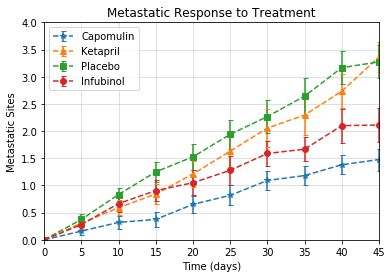

In [43]:
# scatter to show metastatic site count over time per drug
plt.errorbar(np.arange(0, 50, 5), means.loc["Capomulin", "Metastatic Sites"],
             yerr = sems.loc["Capomulin", "Metastatic Sites"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), means.loc["Ketapril", "Metastatic Sites"],
             yerr = sems.loc["Ketapril", "Metastatic Sites"], fmt = '^--', capsize = 2.5, label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), means.loc["Placebo", "Metastatic Sites"],
             yerr = sems.loc["Placebo", "Metastatic Sites"], fmt = 's--', capsize = 2.5, label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), means.loc["Infubinol", "Metastatic Sites"],
             yerr = sems.loc["Infubinol", "Metastatic Sites"], fmt = 'o--', capsize = 2.5, label = "Infubinol")

plt.legend(loc="best")

plt.grid(alpha = 0.5)

plt.title('Metastatic Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Metastatic Sites')

plt.xlim(0,45)
plt.ylim(0,4)

plt.show()

In [44]:
# subset for mouse count to determine survival rate over time
grouped_df = merged_data.groupby(["Drug", "Timepoint"])

subset_df = grouped_df[["Mouse ID"]].count().rename(columns={"Mouse ID": "Mouse Count"})

subset_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

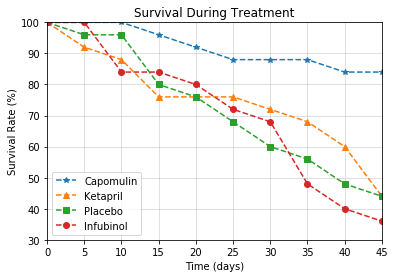

In [45]:
# scatter to show survival rates over time by med
plt.plot(np.arange(0, 50, 5), 100 * subset_df.loc["Capomulin", "Mouse Count"] / 25,
         marker = '*', label = "Capomulin", linestyle = '--')
plt.plot(np.arange(0, 50, 5), 100 * subset_df.loc["Ketapril", "Mouse Count"] / 25,
         marker = '^', label = "Ketapril", linestyle = '--')
plt.plot(np.arange(0, 50, 5), 100 * subset_df.loc["Placebo", "Mouse Count"] / 25,
         marker = 's', label = "Placebo", linestyle = '--')
plt.plot(np.arange(0, 50, 5), 100 * subset_df.loc["Infubinol", "Mouse Count"] / 25,
         marker = 'o', label = "Infubinol", linestyle = '--')

plt.legend(loc = "best")

plt.grid(alpha = 0.5)

plt.title('Survival During Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate (%)')

plt.xlim(0,45)
plt.ylim(30,100)

plt.show()

In [46]:
# determine baseline tumor volume by drug
initial_volumes = merged_data.loc[(merged_data["Timepoint"] == 0), ["Drug", "Tumor Volume (mm3)"]]
init_vol = initial_volumes.groupby("Drug")["Tumor Volume (mm3)"].sum()

# determine final tumor volume by drug
end_vol = pd.DataFrame(columns = ['Drug', 'Tumor Volume (mm3)'])

for mouse in mouse_df["Mouse ID"]:
    max_time = merged_data.loc[merged_data["Mouse ID"] == mouse, "Timepoint"].max()
    vol_final = merged_data.loc[(merged_data["Timepoint"] == max_time) & (merged_data["Mouse ID"] == mouse),
                                ["Drug", "Tumor Volume (mm3)"]]    
    end_vol = pd.concat([end_vol, vol_final])

end_grouped = end_vol.groupby("Drug")["Tumor Volume (mm3)"].sum()

# % tumor volume change by drug
vol_change = 100 * (end_grouped - init_vol) / init_vol

print(vol_change)

Drug
Capomulin   -18.516516
Ceftamin     28.342171
Infubinol    30.442222
Ketapril     39.569314
Naftisol     36.012793
Placebo      34.463143
Propriva     26.580767
Ramicane    -19.574688
Stelasyn     35.827583
Zoniferol    31.513906
Name: Tumor Volume (mm3), dtype: float64


In [48]:
# Referencing http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/
# This function labels each bar (rectangle object) with its height value
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        # print percentage in the center of the bar
        label_position = height / 2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,str('%d' % int(height)) + '%',
                ha = 'center', va = 'bottom', color = 'w', size = 14)

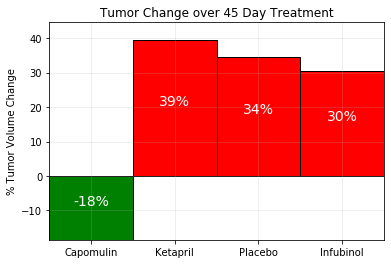

In [49]:
# bar for % change
fig, ax = plt.subplots()

x_axis = np.arange(0,4,1)
heights = [vol_change["Capomulin"], vol_change["Ketapril"], vol_change["Placebo"], vol_change["Infubinol"]]
labels = ["Capomulin", "Ketapril", "Placebo", "Infubinol"]
colors = []

# If the change in volume is positive, assign the color red, else green
for vols in heights:
    if vols >= 0:
        colors.append('r')
    else:
        colors.append('g')

barplot = ax.bar(x_axis, heights, width = 1, align='center', color = colors,
                 edgecolor = 'black', linewidth = 1, tick_label = labels)

ax.set_title("Tumor Change over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")

ax.grid(alpha = 0.25)

ax.set_xlim(-.5,3.5)
ax.set_ylim(min(heights), max(heights) + 5)

autolabel(barplot, ax)

plt.show()